In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [49]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.epoch = pd.to_datetime(train.epoch)
test.epoch = pd.to_datetime(test.epoch)
train.epoch = train.epoch.apply(datetime.timestamp)
test.epoch = test.epoch.apply(datetime.timestamp)

test.epoch = test.epoch - np.min(train.epoch)
train.epoch = train.epoch - np.min(train.epoch)

In [6]:
%matplotlib notebook
train.head()

id      epoch  sat_id             x             y             z        Vx  \
0   0      0.000       0  -8855.823863  13117.780146 -20728.353233 -0.908303   
1   1   2803.000       0 -10567.672384   1619.746066 -24451.813271 -0.302590   
2   2   5606.001       0 -10578.684043 -10180.467460 -24238.280949  0.277435   
3   3   8409.001       0  -9148.251857 -20651.437460 -20720.381279  0.715600   
4   4  11212.002       0  -6719.092336 -28929.061629 -14938.907967  0.992507   

         Vy        Vz         x_sim         y_sim         z_sim    Vx_sim  \
0 -3.808436 -2.022083  -8843.131454  13138.221690 -20741.615306 -0.907527   
1 -4.272617 -0.612796 -10555.500066   1649.289367 -24473.089556 -0.303704   
2 -4.047522  0.723155 -10571.858472 -10145.939908 -24271.169776  0.274880   
3 -3.373762  1.722115  -9149.620794 -20618.200201 -20765.019094  0.712437   
4 -2.519732  2.344703  -6729.358857 -28902.271436 -14992.399986  0.989382   

     Vy_sim    Vz_sim  
0 -3.804930 -2.024133  
1 -4.269816 -0.616468  
2 -4.046788  0.718768  
3 -3.375202  1.718306  
4 -2.522618  2.342237

In [7]:
ddi = train.loc[train['sat_id'] == 249]
ddi.head()

id     epoch  sat_id             x             y            z  \
246776  469143     0.000     249   6567.099955   1610.864166 -5939.555103   
246777  469144  1459.282     249   3904.693214  -9423.253999 -5481.101749   
246778  469145  2918.563     249  -1358.056949 -16017.258339 -1713.148975   
246779  469146  4377.845     249  -6497.279154 -19314.116797  2556.225111   
246780  469147  5837.126     249 -11025.076107 -20664.197447  6609.269065   

              Vx        Vy        Vz         x_sim         y_sim        z_sim  \
246776  0.332199 -8.231654 -1.865205   6563.155065   1562.463551 -5940.669211   
246777 -3.271162 -6.086460  1.968605   3874.198272  -9462.858808 -5462.980781   
246778 -3.678310 -3.184644  2.900941  -1396.451038 -16037.952045 -1693.318873   
246779 -3.326001 -1.484243  2.884883  -6535.638188 -19324.604923  2571.339123   
246780 -2.878484 -0.442630  2.654627 -11061.313091 -20670.855992  6618.774926   

          Vx_sim    Vy_sim    Vz_sim  
246776  0.312810 -8.241722 -1.850613  
246777 -3.282094 -6.071434  1.975505  
246778 -3.679573 -3.174708  2.898921  
246779 -3.324867 -1.479786  2.880996  
246780 -2.876799 -0.441578  2.650642

In [21]:
X = ddi['x']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [14]:
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit(disp=0)
output = model_fit.forecast()

In [29]:
for t in range(len(test)):  #we make a model for each value, training it with all previous values
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t+247987]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=-19386.491425, expected=-19138.216492
predicted=-16786.195845, expected=-16482.898709
predicted=-13646.576419, expected=-13293.426835
predicted=-9977.365988, expected=-9584.014111
predicted=-5815.572470, expected=-5400.035432
predicted=-1252.584158, expected=-862.494416


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=3473.171040, expected=3728.805314
predicted=7796.784959, expected=7676.632622


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10438.425253, expected=9670.784772
predicted=9403.730846, expected=8499.690373
predicted=4660.723633, expected=4684.538607
predicted=-255.423148, expected=-206.339513
predicted=-5014.846512, expected=-5121.682265
predicted=-9652.301525, expected=-9615.660304
predicted=-13377.191101, expected=-13532.908304
predicted=-16585.681012, expected=-16832.254449
predicted=-19289.620262, expected=-19514.729339
predicted=-21422.400173, expected=-21595.425057
predicted=-22974.921544, expected=-23092.380038
predicted=-23959.205795, expected=-24022.178785
predicted=-24392.971222, expected=-24398.287562
predicted=-24280.542475, expected=-24230.545249
predicted=-23630.027115, expected=-23525.180602
predicted=-22442.861860, expected=-22285.144737
predicted=-20724.331726, expected=-20510.784647
predicted=-18468.137211, expected=-18201.113964
predicted=-15672.883032, expected=-15356.312315
predicted=-12346.529191, expected=-11982.852383
predicted=-8504.279441, expected=-8104.399833
predicted=-41

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-14034.968826, expected=-14216.058953
predicted=-17147.476300, expected=-17383.895491
predicted=-19719.778419, expected=-19925.562403
predicted=-21700.397624, expected=-21856.905526
predicted=-23096.166722, expected=-23196.253865
predicted=-23916.032028, expected=-23960.464745
predicted=-24174.218214, expected=-24163.432638
predicted=-23881.027394, expected=-23815.680897
predicted=-23043.759313, expected=-22924.489045
predicted=-21666.969178, expected=-21494.394315
predicted=-19753.213775, expected=-19528.151212
predicted=-17302.843419, expected=-17028.502227
predicted=-14325.497094, expected=-14001.577759
predicted=-10828.575866, expected=-10463.586919
predicted=-6844.380747, expected=-6455.250897


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-2453.649306, expected=-2073.925853
predicted=2160.841338, expected=2457.141569
predicted=6595.197220, expected=6641.121429
predicted=9945.827562, expected=9493.884332


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10608.176460, expected=9712.370957
predicted=7367.454010, expected=6956.144822
predicted=2273.554097, expected=2423.282491
predicted=-2474.247091, expected=-2570.644402
predicted=-7325.025525, expected=-7324.862713
predicted=-11504.786312, expected=-11558.433883
predicted=-14969.702409, expected=-15177.560149
predicted=-17933.971308, expected=-18162.837393
predicted=-20330.958225, expected=-20522.630496
predicted=-22136.144217, expected=-22274.150951
predicted=-23352.989851, expected=-23435.739590
predicted=-23996.476510, expected=-24023.773714


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-24079.155678, expected=-24051.549947
predicted=-23610.875100, expected=-23529.060774
predicted=-22597.154355, expected=-22463.249517
predicted=-21046.771478, expected=-20858.658461
predicted=-18958.456318, expected=-18718.627831
predicted=-16337.052150, expected=-16047.511095
predicted=-13188.442632, expected=-12854.950415
predicted=-9536.011728, expected=-9164.255145
predicted=-5417.799204, expected=-5031.209623
predicted=-943.096496, expected=-583.966326
predicted=3654.023363, expected=3890.128878
predicted=7850.724631, expected=7772.891919
predicted=10558.826786, expected=9943.075422
predicted=10089.820988, expected=9237.028744
predicted=5977.118635, expected=5813.945058
predicted=943.699604, expected=1043.181527
predicted=-3831.730276, expected=-3932.907649
predicted=-8580.597736, expected=-8561.484921
predicted=-12523.053962, expected=-12629.725129
predicted=-15848.807421, expected=-16070.869082
predicted=-18655.888089, expected=-18875.729778
predicted=-20881.684695, ex

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-24020.238179, expected=-24030.798814
predicted=-23929.530779, expected=-23885.518908
predicted=-23288.264322, expected=-23190.430092
predicted=-22101.674073, expected=-21952.284530
predicted=-20378.921773, expected=-20175.840134
predicted=-18119.214556, expected=-17865.346338
predicted=-15327.755459, expected=-15027.303099
predicted=-12018.914519, expected=-11675.767934
predicted=-8217.532743, expected=-7843.004228
predicted=-3982.789904, expected=-3603.338205
predicted=547.495119, expected=877.511515
predicted=5072.225130, expected=5235.626690


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8939.489821, expected=8720.971735
predicted=10867.636943, expected=10120.798653
predicted=9255.161249, expected=8538.340801
predicted=4570.964525, expected=4588.732084
predicted=-342.495050, expected=-326.347800


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-5177.370448, expected=-5245.548514
predicted=-9741.534569, expected=-9735.466596
predicted=-13484.335668, expected=-13635.491047
predicted=-16673.131238, expected=-16899.443725
predicted=-19319.553432, expected=-19525.881346
predicted=-21370.789614, expected=-21529.347018
predicted=-22824.116587, expected=-22928.538370
predicted=-23692.310837, expected=-23741.460663
predicted=-23989.342583, expected=-23983.546509
predicted=-23727.108202, expected=-23667.092515
predicted=-22914.776786, expected=-22801.346332
predicted=-21559.026267, expected=-21393.029475
predicted=-19664.819620, expected=-19447.351521
predicted=-17236.985690, expected=-16969.842006
predicted=-14283.126158, expected=-13969.768118
predicted=-10819.307847, expected=-10466.668788
predicted=-6879.427600, expected=-6504.019297
predicted=-2547.390071, expected=-2178.583824
predicted=2005.629045, expected=2298.339096
predicted=6399.760456, expected=6473.494504
predicted=9830.474570, expected=9462.982172
predicted=10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=8178.357825, expected=7661.089805
predicted=3207.589224, expected=3313.495724
predicted=-1620.502971, expected=-1673.226843
predicted=-6480.534288, expected=-6506.764534
predicted=-10819.687998, expected=-10848.734996
predicted=-14395.496192, expected=-14578.744045
predicted=-17442.600212, expected=-17666.405375


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-19923.450848, expected=-20116.179077
predicted=-21800.864396, expected=-21944.538823
predicted=-23082.525179, expected=-23170.522896
predicted=-23779.024548, expected=-23811.876723
predicted=-23905.401817, expected=-23883.605717
predicted=-23473.270382, expected=-23397.625616
predicted=-22491.610854, expected=-22362.991343
predicted=-20967.185732, expected=-20786.570976
predicted=-18904.279207, expected=-18674.291658
predicted=-16312.984331, expected=-16033.387486
predicted=-13200.128726, expected=-12876.613683
predicted=-9588.949184, expected=-9230.266477
predicted=-5526.086093, expected=-5151.650729
predicted=-1115.464801, expected=-764.560681
predicted=3424.026701, expected=3665.080701
predicted=7613.981736, expected=7582.743385
predicted=10495.044947, expected=9981.710862


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=10530.273485, expected=9704.755881
predicted=6946.104403, expected=6646.923316
predicted=1902.414097, expected=2012.447685
predicted=-2906.359902, expected=-2990.035108
predicted=-7718.677636, expected=-7716.543247
predicted=-11830.534268, expected=-11903.818055
predicted=-15259.371928, expected=-15462.634736
predicted=-18157.936170, expected=-18374.819312
predicted=-20469.709191, expected=-20649.356177
predicted=-22177.552577, expected=-22304.134119
predicted=-23286.557420, expected=-23358.364558
predicted=-23812.668046, expected=-23829.512508
predicted=-23769.685630, expected=-23732.205346
predicted=-23168.995623, expected=-23078.070503
predicted=-22019.512370, expected=-21876.105968
predicted=-20328.271735, expected=-20133.523749
predicted=-18101.686461, expected=-17857.270156
predicted=-15347.947140, expected=-15056.772823
predicted=-12081.443116, expected=-11749.098335
predicted=-8329.790755, expected=-7968.957371
predicted=-4158.543616, expected=-3790.248598
predicted=3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=9909.590488, expected=9157.501778
predicted=5640.015210, expected=5531.529850
predicted=640.664849, expected=702.744704
predicted=-4194.929278, expected=-4272.562849
predicted=-8883.017144, expected=-8875.923790
predicted=-12787.163723, expected=-12903.405240


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-16076.787281, expected=-16290.110167
predicted=-18820.254101, expected=-19027.379947
predicted=-20964.104863, expected=-21127.682249
predicted=-22499.237030, expected=-22609.936686
predicted=-23437.577052, expected=-23493.411983
predicted=-23794.199498, expected=-23795.294583
predicted=-23582.765918, expected=-23529.894610
predicted=-22814.535139, expected=-22708.654547
predicted=-21498.485688, expected=-21340.665983
predicted=-19642.114335, expected=-19433.707585
predicted=-17253.021543, expected=-16996.089937
predicted=-14341.802253, expected=-14040.002595


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-10927.491251, expected=-10587.817875
predicted=-7048.054777, expected=-6684.650558
predicted=-2780.780425, expected=-2424.136672
predicted=1705.707353, expected=1998.099171
predicted=6071.773561, expected=6176.912717
predicted=9611.177202, expected=9332.367152
predicted=11050.189117, expected=10317.112742
predicted=9037.794852, expected=8424.285685
predicted=4321.562045, expected=4343.801457
predicted=-603.731223, expected=-603.869881
predicted=-5468.505615, expected=-5518.852765
predicted=-9976.536689, expected=-9986.641533
predicted=-13698.376574, expected=-13850.246031
predicted=-16848.021529, expected=-17063.894639
predicted=-19430.894167, expected=-19626.394902
predicted=-21404.417021, expected=-21552.907362
predicted=-22768.219658, expected=-22863.099056
predicted=-23536.193200, expected=-23576.223041


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-23723.636762, expected=-23709.207974
predicted=-23344.142664, expected=-23276.121078
predicted=-22408.897381, expected=-22288.337126
predicted=-20927.093952, expected=-20755.212580
predicted=-18905.583822, expected=-18685.348552
predicted=-16357.592362, expected=-16088.823101
predicted=-13292.650501, expected=-12981.258544
predicted=-9736.824318, expected=-9391.557981
predicted=-5738.933406, expected=-5377.242118
predicted=-1398.265066, expected=-1055.850050
predicted=3080.476513, expected=3330.334079
predicted=7274.383677, expected=7291.046615
predicted=10344.752647, expected=9935.292914
predicted=10911.449653, expected=10136.907164
predicted=7968.665378, expected=7533.547725
predicted=3020.144155, expected=3102.406126
predicted=-1855.623184, expected=-1903.397254
predicted=-6711.093211, expected=-6731.814834
predicted=-11011.579347, expected=-11053.699805
predicted=-14571.466954, expected=-14749.464644
predicted=-17575.492980, expected=-17788.526173
predicted=-19991.824602

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-23581.547630, expected=-23590.333884


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-23429.705197, expected=-23384.679429
predicted=-22713.588469, expected=-22615.855225
predicted=-21444.639934, expected=-21295.488889
predicted=-19633.020765, expected=-19434.048665
predicted=-17289.163422, expected=-17042.679450
predicted=-14426.629506, expected=-14136.448220
predicted=-11065.955749, expected=-10740.314645
predicted=-7251.013414, expected=-6900.578353
predicted=-3055.294427, expected=-2707.635301
predicted=1365.872216, expected=1657.913573
predicted=5701.942309, expected=5834.844468
predicted=9334.789562, expected=9138.198964
predicted=11151.590591, expected=10516.880279
predicted=9811.037345, expected=9138.033066
predicted=5484.190503, expected=5390.465635
predicted=480.196082, expected=523.694740
predicted=-4398.436970, expected=-4459.638574
predicted=-9052.134214, expected=-9055.542067
predicted=-12944.026843, expected=-13061.113913
predicted=-16207.290030, expected=-16410.713242
predicted=-18898.542768, expected=-19095.610514
predicted=-20974.483131, exp

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-15481.291165, expected=-15212.370557
predicted=-12319.384142, expected=-12011.598959
predicted=-8689.259284, expected=-8352.933674
predicted=-4652.888654, expected=-4307.725367
predicted=-328.689909, expected=-13.309342
predicted=4051.536626, expected=4261.639670
predicted=8032.127739, expected=8001.753802
predicted=10759.426326, expected=10328.458583
predicted=10944.964424, expected=10220.990104
predicted=7818.179969, expected=7437.724607
predicted=2878.174915, expected=2939.103939
predicted=-2047.999926, expected=-2087.448172
predicted=-6897.759243, expected=-6917.025893
predicted=-11174.850001, expected=-11224.747417
predicted=-14719.400895, expected=-14890.484838
predicted=-17680.523905, expected=-17883.380684
predicted=-20035.397058, expected=-20208.752924
predicted=-21760.476296, expected=-21885.089463
predicted=-22863.316644, expected=-22934.221702
predicted=-23360.716074, expected=-23377.243679
predicted=-23270.162530, expected=-23233.007600
predicted=-22607.469832, 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-15549.557217, expected=-15735.613829
predicted=-18350.603449, expected=-18547.111957


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-20531.144878, expected=-20691.066663
predicted=-22078.500162, expected=-22187.835493
predicted=-23004.483879, expected=-23059.812131
predicted=-23327.042396, expected=-23328.166363
predicted=-23063.873532, expected=-23011.731278
predicted=-22231.008527, expected=-22126.957462
predicted=-20842.841749, expected=-20688.531544
predicted=-18913.105898, expected=-18710.628773
predicted=-16456.744895, expected=-16209.069012
predicted=-13493.180497, expected=-13205.051447
predicted=-10052.212024, expected=-9731.865931
predicted=-6184.917589, expected=-5847.440751
predicted=-1984.471588, expected=-1658.553999
predicted=2372.844330, expected=2631.959877
predicted=6547.901424, expected=6637.834387
predicted=9898.966292, expected=9666.078876
predicted=11344.271781, expected=10724.268565
predicted=9714.192320, expected=9106.634361
predicted=5336.248788, expected=5248.926085
predicted=310.958151, expected=343.223595
predicted=-4602.055471, expected=-4650.981990
predicted=-9228.999297, exp

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-8865.641337, expected=-8541.380899
predicted=-4896.201472, expected=-4562.044772
predicted=-640.896138, expected=-331.164307
predicted=3687.221274, expected=3907.283538
predicted=7682.580944, expected=7697.143979
predicted=10598.826925, expected=10258.515193
predicted=11274.999218, expected=10605.391999
predicted=8774.264432, expected=8290.277592
predicted=4032.388194, expected=4034.705290


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-967.064615, expected=-970.919602
predicted=-5863.488316, expected=-5897.262819
predicted=-10315.575464, expected=-10344.159078
predicted=-14011.106473, expected=-14154.403506
predicted=-17085.749957, expected=-17281.576805
predicted=-19548.870292, expected=-19725.589980
predicted=-21371.932184, expected=-21504.092898
predicted=-22561.616423, expected=-22640.102187
predicted=-23131.338479, expected=-23156.782913
predicted=-23104.691438, expected=-23075.445227


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-22496.591254, expected=-22415.068148
predicted=-21324.786814, expected=-21192.662710
predicted=-19603.755580, expected=-19424.279938
predicted=-17353.263393, expected=-17126.791387
predicted=-14589.076063, expected=-14320.908656
predicted=-11339.581130, expected=-11036.449137
predicted=-7648.161653, expected=-7321.880470
predicted=-3589.985286, expected=-3262.236302
predicted=698.210095, expected=986.560625
predicted=4960.399312, expected=5133.166272
predicted=8715.773771, expected=8645.471922
predicted=11111.399403, expected=10668.003003
predicted=10956.221775, expected=10279.720934
predicted=7674.472354, expected=7333.821636
predicted=2725.055948, expected=2769.381792
predicted=-2249.519342, expected=-2280.683395
predicted=-7093.976581, expected=-7112.908790
predicted=-11350.884310, expected=-11405.569170
predicted=-14874.414400, expected=-15038.304257
predicted=-17787.377118, expected=-17980.590716
predicted=-20074.407783, expected=-20238.956025
predicted=-21717.290454, e

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-13590.288655, expected=-13313.151445
predicted=-10206.603999, expected=-9897.917534
predicted=-6403.792713, expected=-6077.634580


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-2271.099631, expected=-1954.541086
predicted=2023.409708, expected=2284.557721
predicted=6177.771851, expected=6294.494377
predicted=9626.451114, expected=9463.508732
predicted=11415.618798, expected=10882.139577
predicted=10396.195789, expected=9759.205277
predicted=6463.360623, expected=6262.522661
predicted=1423.735598, expected=1470.737055


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=-3534.743395, expected=-3577.331730
predicted=-8281.600852, expected=-8293.953803
predicted=-12338.420036, expected=-12422.909581
predicted=-15696.396850, expected=-15873.885254
predicted=-18442.116242, expected=-18629.270996
predicted=-20549.571461, expected=-20700.961092
predicted=-22010.065317, expected=-22111.344613
predicted=-22837.543725, expected=-22885.125836
predicted=-23052.219226, expected=-23045.985255
predicted=-22674.396158, expected=-22615.478572
predicted=-21723.016403, expected=-21613.070061
predicted=-20215.824368, expected=-20056.892696
predicted=-18170.523079, expected=-17965.215522
predicted=-15606.945094, expected=-15358.915013
predicted=-12550.771504, expected=-12265.669718
predicted=-9040.037948, expected=-8727.336210
predicted=-5136.989737, expected=-4813.404352
predicted=-950.060051, expected=-646.214201
predicted=3324.240808, expected=3551.722370
predicted=7323.370967, expected=7375.082291
predicted=10392.880874, expected=10132.631157
predicted=1149

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=5185.622818, expected=5100.422896
predicted=127.738006, expected=153.769033
predicted=-4814.109196, expected=-4853.684179
predicted=-9419.591781, expected=-9437.063409
predicted=-13281.206834, expected=-13394.474680
predicted=-16475.424285, expected=-16660.114323
predicted=-19047.294389, expected=-19226.880124
predicted=-20973.487288, expected=-21111.024196
predicted=-22250.588673, expected=-22336.643805
predicted=-22896.853719, expected=-22929.052434
predicted=-22933.453882, expected=-22912.154724
predicted=-22381.147039, expected=-22307.707131
predicted=-21259.312688, expected=-21135.578646
predicted=-19586.482473, expected=-19414.718316
predicted=-17381.737673, expected=-17164.891025
predicted=-14667.281302, expected=-14409.575231
predicted=-11472.832736, expected=-11180.893822
predicted=-7843.314074, expected=-7528.322128
predicted=-3852.857827, expected=-3534.600707
predicted=369.176760, expected=654.556702
predicted=4588.971296, expected=4775.717494
predicted=8379.74021

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=2557.853446, expected=2589.922766
predicted=-2463.147883, expected=-2486.470656
predicted=-7303.553104, expected=-7322.329095
predicted=-11541.251321, expected=-11598.279269
predicted=-15037.643863, expected=-15194.212464
predicted=-17896.593813, expected=-18080.678871
predicted=-20109.970903, expected=-20266.124139
predicted=-21664.747109, expected=-21773.225445
predicted=-22573.178546, expected=-22628.589440
predicted=-22856.727879, expected=-22858.467952
predicted=-22538.129557, expected=-22487.247497
predicted=-21639.018426, expected=-21537.314458
predicted=-20180.038767, expected=-20029.748908
predicted=-18181.816087, expected=-17985.747360
predicted=-15667.048051, expected=-15429.004347
predicted=-12664.050726, expected=-12389.668263
predicted=-9212.762908, expected=-8911.126981
predicted=-5375.503007, expected=-5062.069322
predicted=-1256.326025, expected=-958.520761
predicted=2962.891617, expected=3195.716664
predicted=6957.670821, expected=7038.993805


In [37]:
TST = [x for x in test]

[array([-19386.49142499]),
 array([-19386.49142499]),
 array([-19386.49142499]),
 array([-16786.19584508]),
 array([-13646.57641906]),
 array([-9977.36598763]),
 array([-5815.57246973]),
 array([-1252.58415765]),
 array([3473.1710401]),
 array([7796.78495876]),
 array([10438.42525307]),
 array([9403.73084605]),
 array([4660.72363258]),
 array([-255.42314813]),
 array([-5014.84651155]),
 array([-9652.30152477]),
 array([-13377.19110088]),
 array([-16585.6810122]),
 array([-19289.62026243]),
 array([-21422.40017288]),
 array([-22974.92154447]),
 array([-23959.20579478]),
 array([-24392.97122215]),
 array([-24280.54247455]),
 array([-23630.02711493]),
 array([-22442.86186001]),
 array([-20724.3317261]),
 array([-18468.13721084]),
 array([-15672.8830319]),
 array([-12346.52919144]),
 array([-8504.27944107]),
 array([-4196.28559853]),
 array([443.0269884]),
 array([5097.52464744]),
 array([9012.30937073]),
 array([10633.48118087]),
 array([8186.0776298]),
 array([3055.54175755]),
 array([-1

In [38]:
error = mean_squared_error(TST, predictions)
print('Test MSE: %.3f' % error)

ValueError: Found input variables with inconsistent numbers of samples: [625, 627]

<IPython.core.display.Javascript object>


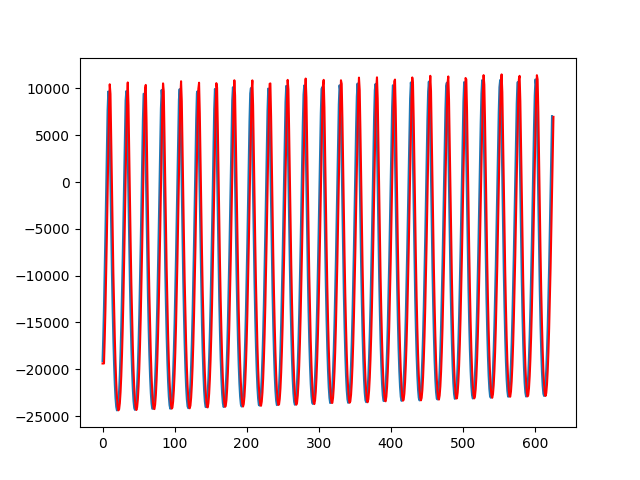

In [58]:
pyplot.plot(TST)
pyplot.plot(predictions, color='red')
pyplot.show()

Now lets see satelite 37

In [50]:
train.head()

id      epoch  sat_id             x             y             z        Vx  \
0   0      0.000       0  -8855.823863  13117.780146 -20728.353233 -0.908303   
1   1   2803.000       0 -10567.672384   1619.746066 -24451.813271 -0.302590   
2   2   5606.001       0 -10578.684043 -10180.467460 -24238.280949  0.277435   
3   3   8409.001       0  -9148.251857 -20651.437460 -20720.381279  0.715600   
4   4  11212.002       0  -6719.092336 -28929.061629 -14938.907967  0.992507   

         Vy        Vz         x_sim         y_sim         z_sim    Vx_sim  \
0 -3.808436 -2.022083  -8843.131454  13138.221690 -20741.615306 -0.907527   
1 -4.272617 -0.612796 -10555.500066   1649.289367 -24473.089556 -0.303704   
2 -4.047522  0.723155 -10571.858472 -10145.939908 -24271.169776  0.274880   
3 -3.373762  1.722115  -9149.620794 -20618.200201 -20765.019094  0.712437   
4 -2.519732  2.344703  -6729.358857 -28902.271436 -14992.399986  0.989382   

     Vy_sim    Vz_sim  
0 -3.804930 -2.024133  
1 -4.269816 -0.616468  
2 -4.046788  0.718768  
3 -3.375202  1.718306  
4 -2.522618  2.342237

In [98]:
traini = train.loc[train['sat_id'] == 37]
testi = test.loc[test['sat_id'] == 37]

TR = traini['x']
TE  = testi['x_sim']

history = [x for x in TR]

model = ARIMA(history, order=(10,1,0))
model_fit = model.fit(disp = 0)
forecast = forecast = model_fit.forecast(steps=len(TE))[0]

<IPython.core.display.Javascript object>


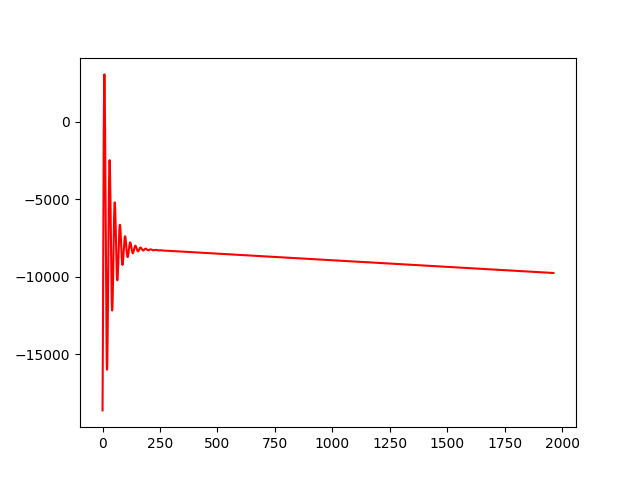

In [99]:
#pyplot.plot(history)
pyplot.plot(forecast, color='red')
pyplot.show()